### Inventory Optimization- ABC analysis

####  <font color='blue'>This file analyses the inventory storage data and gives information and ideas about, how one can segregate the items based on there usage and can optimize the inventory. It follows ABC method where items are categorized as fast, medium and slow moving category. It can be seen which items contribute to most of the sales. And if there is a need to exchange items between fast and medium category group items, this also be shown in the analysisbar</font>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\ABC_Analysis_.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,SRCLOC,SRCARE,PCKQTY,PCKSTS,PRTNUM,FTPCOD,pckdate,Ordernum,Weeks
0,D-23-007,AREA-A,6,C,5942877,6,02-12-23,1448908736,49
1,B-29-006,AREA-A,6,C,5938644,6,02-12-23,1448909184,49
2,B-09-015,AREA-A,6,C,5938641,6,02-12-23,1448874923,49
3,A-08-026,AREA-A,6,C,5942744,6,02-12-23,1448892109,49
4,B-11-010,AREA-A,6,C,5938649,6,02-12-23,1448911172,49


Creating a dataframe to see the total number of quantities being picked of a certain item 

In [4]:
prtnum_grpby = df.groupby(['PRTNUM']).sum()[['PCKQTY']].sort_values(by= 'PCKQTY', ascending= False)
prtnum_grpby.head()

,PCKQTY
PRTNUM,
5968389,356070
5968438,312210
5968391,293490
5968388,282000
5968436,280170


In [5]:
# total quantities picked
total_pcked_qty = prtnum_grpby['PCKQTY'].sum()

In [6]:
# percentage share of each item number in quantities picked

prtnum_grpby['% PCKQTY'] = (prtnum_grpby['PCKQTY']/total_pcked_qty)*100

In [7]:
def cumsum(series):
    '''
    function takes a int/float datatype series as input and 
    calculates cumulative sum of the series
    '''
    j = []
    i=0
    for x in prtnum_grpby['% PCKQTY']:
        i = i+x
        j.append(i)
    return j

In [8]:
# Cumulative sum of % items picked
prtnum_grpby['%PCKQTY_CUMSUM'] = cumsum(prtnum_grpby['% PCKQTY'])

---
Categorizing the items into A, B, C category based on the cumilative sum of % picked quantity.
Where the A category items are those which are contributing for 60% of the total picked quantites and the items are sorted 
based on their contribution, so the very first most picked items will be A type, then the next 20% are B type, which 
are contributing after 60% of items picked and all categorized to B type till 80% and remaining items in C type category
the slow moving goods.

In [9]:
prtnum_grpby['GoodsType'] = prtnum_grpby['%PCKQTY_CUMSUM'].apply(lambda x: 'C' if x>80 else ('A' if x<60 else 'B'))

---
Here we can see that the A type of goods which are contributing to 60 % of the volume has <b>very low number of items</b>
and the C type of item which is slow moving is contributing 20% has so many items involved becuase the frequency of 
these items are quite low becuase of slow moving item 

In [10]:
prtnum_grpby.GoodsType.value_counts()

C    7663
B     772
A     263
Name: GoodsType, dtype: int64

In [11]:
prtnum_grpby

,PCKQTY,% PCKQTY,%PCKQTY_CUMSUM,GoodsType
PRTNUM,,,,
5968389,356070,1.712421,1.712421,A
5968438,312210,1.501489,3.213910,A
5968391,293490,1.411460,4.625370,A
5968388,282000,1.356202,5.981572,A
5968436,280170,1.347401,7.328972,A
...,...,...,...,...
5983652,3,0.000014,99.999947,C
5983649,3,0.000014,99.999962,C
5983634,3,0.000014,99.999976,C


---
From the pie chart we can see the number of itesm that belongs to a particular category. There are 7663 number of articles
which contributes to 88.1% of C category items and we can see that ony 3% of item numbers belongs to A category, which has
a share of 80% in total quantities picked.

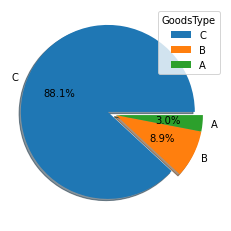

In [12]:

explode = (0.1, 0,0)
plt.pie(prtnum_grpby.GoodsType.value_counts(), explode = explode, shadow = True,
        labels = prtnum_grpby.GoodsType.value_counts().index, autopct='%1.1f%%')

plt.legend(title = 'GoodsType')
plt.show()

### 2. Analyzing a particular case- Optimization of fast and slow moving area

In [13]:
# Total picked quantities based on area category of items
src_area_pckqty = df.groupby('SRCARE').sum()[['PCKQTY']]
src_area_pckqty

,PCKQTY
SRCARE,
AREA-A,14363654
AREA-B,6429711


In [14]:
src_area_pckqty["%pcked_qty"]= (src_area_pckqty/src_area_pckqty.sum()*100).round(2)

In [15]:
src_area_pckqty

,PCKQTY,%pcked_qty
SRCARE,,
AREA-A,14363654,69.08
AREA-B,6429711,30.92


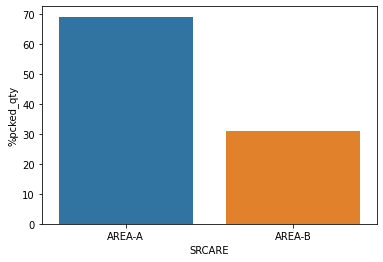

In [16]:
# Distribution of picked volume percentage by area
sns.barplot(x = src_area_pckqty.index, y = src_area_pckqty['%pcked_qty'], data = src_area_pckqty, linewidth=1.5);

#### 2.1- AREA-A items

In [17]:
# Selecting items which are in fast moving area

df_fast = df[df['SRCARE']=='AREA-A'].groupby('PRTNUM').sum()[['PCKQTY']]
df_fast.head()

,PCKQTY
PRTNUM,
5922116,312
5922117,192
5922118,336
5922119,714
5922120,264


In [18]:
# percentage of picked quantity volume in Area-A
df_fast['% Pckqty'] = ((df_fast/df_fast.sum())*100).round(3).sort_values(by='PCKQTY', ascending = False)

In [19]:
# Cumulative sum of % items picked
df_fast['% Pckqty_cumsum'] = np.cumsum(df_fast['% Pckqty'].sort_values())

In [20]:
df_fast = df_fast.sort_values(by = '% Pckqty_cumsum')

In [21]:
df_fast
# the table below shows the quantities picked, their fraction in percantage and cumilative sum of picked quantities

,PCKQTY,% Pckqty,% Pckqty_cumsum
PRTNUM,,,
5997590,19,0.000,0.000
5997596,3,0.000,0.000
5997594,16,0.000,0.000
5997593,2,0.000,0.000
5997592,3,0.000,0.000
...,...,...,...
5968436,280170,1.951,91.345
5968388,282000,1.963,93.308
5968391,293490,2.043,95.351


#### 2.2- Slow moving area items analysis

In [22]:
df_slow = df[df['SRCARE']=='AREA-B'].groupby('PRTNUM').sum()[['PCKQTY']]
df_slow.head()

,PCKQTY
PRTNUM,
5922114,276
5922115,150
5922116,204
5922117,78
5922118,84


In [23]:
# percentage of picked quantity
df_slow['% Pckqty'] = ((df_slow/df_slow.sum())*100).round(3).sort_values(by='PCKQTY', ascending = False)

In [24]:
# Cumulative sum of items picked
df_slow['% Pckqty_cumsum'] = np.cumsum(df_slow['% Pckqty'].sort_values())

In [25]:
# arranging the items with % of cumulative sum in increasing order
# sorting number of items which can be interchanged between slow and fast moving items

df_slow = df_slow.sort_values(by = '% Pckqty_cumsum', ascending = False)

---
As the Area-A has the fast moving goods, thus moving items to A-Area from B-Area where the item frequency of B-Area items are more than the A-area. To calculate that first we have sorted out both the dataframe df_fast and df_slow in ascending and descending order of picked quantities. And we are calculating the ratio of df_fast and df_slow picked quantities, which will give the a limit upto which we want to exchange the slow and fast moving goods.    

In [26]:
# From this calculation we can interchange 622 articles between the both category items
# It will help improve the picking efficiency

for i in range(10000):
    diff = df_fast['PCKQTY'][i:i+1].values/df_slow['PCKQTY'][i:i+1].values
    if diff>0.8:
        print(diff, i)
        break

[0.81568627] 622


In [27]:
# 52% of the picked quantity items can be moved to fast moving area
df_slow.iloc[622,]

PCKQTY             2550.000
% Pckqty              0.040
% Pckqty_cumsum      52.065
Name: 5963482, dtype: float64

In [28]:
# all the items SKU from Area-B, which can be transferred to Area-A (fast moving area)

df_slow.iloc[:622,].index.to_list()

[5968948,
 5940686,
 5968455,
 5940579,
 5968896,
 5968470,
 5968895,
 5968469,
 5968903,
 5954087,
 5968449,
 5968923,
 5971402,
 5971355,
 5968944,
 5968924,
 5968467,
 5973240,
 5968950,
 5954102,
 6003760,
 5968468,
 5940687,
 5973373,
 5968894,
 5968900,
 5954104,
 5973440,
 5968451,
 5973107,
 5968904,
 5968893,
 6003519,
 5954071,
 5954116,
 6003741,
 5968891,
 5954228,
 5968892,
 5940696,
 5968890,
 5968454,
 5954131,
 5971840,
 6003736,
 5954133,
 5968447,
 5973174,
 6003763,
 6003764,
 5973273,
 6003758,
 5970974,
 5973307,
 5954057,
 5954272,
 5963479,
 5968419,
 5971678,
 5973140,
 5954146,
 5954220,
 5954043,
 5968899,
 5954234,
 6003743,
 5970981,
 5973040,
 5953998,
 5954086,
 5968897,
 5971282,
 5954294,
 6003518,
 5954042,
 6003737,
 5954176,
 5972306,
 6003757,
 5954190,
 5954279,
 5968943,
 5968915,
 5954144,
 5953969,
 5954161,
 5968914,
 5972907,
 5968421,
 5971109,
 5972940,
 5971980,
 5972273,
 5968951,
 5954235,
 5954257,
 5954160,
 5954264,
 5971853,
 5968475,


In [29]:
# all the items SKU from Area-A, which can be transferred to Area-B (slow moving area)

df_fast.iloc[:622,].index.to_list()

[5997590,
 5997596,
 5997594,
 5997593,
 5997592,
 5997591,
 5997589,
 5997587,
 5997585,
 5997583,
 5997582,
 5997581,
 5997580,
 5997579,
 5997578,
 5977740,
 5971802,
 5950831,
 5952691,
 5942405,
 5953574,
 5962443,
 5962441,
 5962428,
 5942674,
 5942700,
 5962436,
 5998320,
 5942513,
 5997586,
 5947027,
 5947028,
 6009554,
 5942525,
 5940556,
 5977737,
 5942658,
 5949503,
 5942641,
 5998283,
 5997641,
 5997639,
 5946999,
 5946997,
 5962439,
 5997588,
 5997584,
 5998335,
 5998342,
 5922136,
 5947015,
 5953518,
 5963498,
 5963489,
 5953550,
 6009515,
 5962440,
 5922117,
 5947000,
 5922130,
 5942633,
 5946994,
 5953521,
 5922132,
 5977746,
 5977768,
 5953542,
 5922124,
 5963450,
 5953594,
 5922118,
 5922128,
 5943248,
 5922120,
 5942631,
 5922123,
 5942438,
 5942441,
 5942450,
 5942431,
 5942463,
 5942466,
 5969587,
 5946993,
 5942417,
 5942516,
 5942402,
 5942520,
 5942379,
 5942368,
 5942333,
 5942332,
 5942528,
 5942567,
 5942576,
 5942614,
 5942936,
 5949500,
 5922116,
 5947024,
